In [1]:
import json
import modin.pandas as pd
import glob
import sys
import warnings
warnings.filterwarnings('ignore')

# Make a shotmap and a passmap using statsbomb data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# pitch size (yards)
pitchLengthX=120
pitchWidthY=80

In [4]:
# ENG v SWE - WWC19 
match_id_required = 69301
home_team_required = "England Women's"
away_team_required = "Sweden Women's"

file_name = '{}.json'.format(match_id_required)

with open('../datahub/statsbomb/open-data/data/events/{}'.format(file_name)) as data_file:
    data = json.load(data_file)

from pandas.io.json import json_normalize
df = json_normalize(data, sep = "_").assign(match_id = file_name[:-5])
df.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,pass_straight,block_save_block,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name,match_id
0,e8643796-c76d-44f5-a03d-fa742e051942,1,1,00:00:00.000,0,0,1,0.00000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69301
1,937f83f8-674d-4c58-81d5-e2101a9f2e60,2,1,00:00:00.000,0,0,1,0.00000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69301
2,87ba272a-3af0-4fc7-872f-65e8f79fb753,3,1,00:00:00.000,0,0,1,0.00000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69301
3,85d30bef-8b77-405e-bc64-c63ed4d7a6d7,4,1,00:00:00.000,0,0,1,0.00000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69301
4,760528a6-2de2-427f-9795-b2b19819ef1f,5,1,00:00:00.140,0,0,2,0.16873,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69301


In [5]:
# shots dataframe
shots = df.query("type_name=='Shot'").set_index('id')
shots.sample(3)

,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,...,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,pass_straight,block_save_block,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name,match_id
id,,,,,,,,,,,,,,,,,,,,,
300ca316-03cf-4aa1-b12c-68d91ffb6f1e,2205,2,00:16:32.408,61,32,126,1.311600,16,Shot,865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69301
309f6f06-3977-49ac-8c0b-0e31b54404ed,742,1,00:22:46.449,22,46,37,1.118733,16,Shot,865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69301
cb2480d3-d896-4568-9fb5-d0a4d1a70ddd,1795,2,00:04:55.985,49,55,102,1.399900,16,Shot,865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69301


In [8]:
sys.path
sys.path.insert(0,'/media/csivsw/crossOS/playground/friends_of_tracking/src/friends_of_tracking/SoccermaticsForPython/')

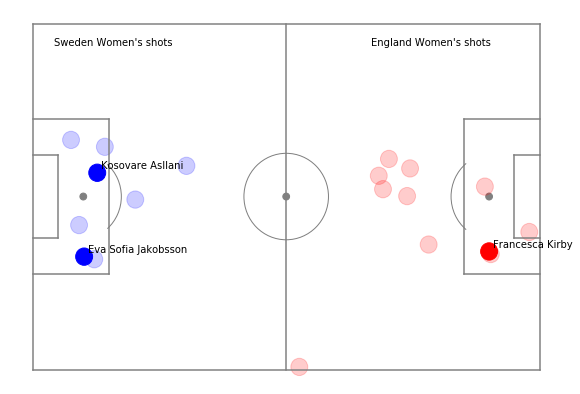

In [9]:
# draw the pitch
from FCPython import createPitch

(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')

#Plot the shots
for i,shot in shots.iterrows():
    x=shot['location'][0]
    y=shot['location'][1]
    
    goal=shot['shot_outcome_name']=='Goal'
    team_name=shot['team_name']
    
    circleSize=2
    #circleSize=np.sqrt(shot['shot_statsbomb_xg']*15)

    if (team_name==home_team_required):
        if goal:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")
            plt.text((x+1),pitchWidthY-y+1,shot['player_name']) 
        else:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")     
            shotCircle.set_alpha(.2)
    elif (team_name==away_team_required):
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue") 
            plt.text((pitchLengthX-x+1),y+1,shot['player_name']) 
        else:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue")      
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
    
    
plt.text(5,75,away_team_required + ' shots');
plt.text(80,75,home_team_required + ' shots');

fig.set_size_inches(10, 7)
fig.savefig('../output/shots.pdf', dpi=100)

#Exercise: 
#1, Create a dataframe of passes which contains all the passes in the match
#2, Plot the start point of every Sweden pass. Attacking left to right.
#3, Plot only passes made by Caroline Seger (she is Sara Caroline Seger in the database)
#4, Plot arrows to show where the passes we

In [10]:
passes = df.query("type_name=='Pass'")
passes.sample(3)

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,pass_straight,block_save_block,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name,match_id
849,d237897d-20b3-4b12-b0e9-edfd7a4c6467,850,1,00:28:06.518,28,6,44,1.026500,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69301
3253,fcc4ba23-e88c-4927-b39c-95a87c4f7800,3254,2,00:47:45.836,92,45,195,2.617000,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69301
1060,966a6eae-e757-4b2b-8b0a-a312561b3245,1061,1,00:37:05.164,37,5,60,0.927591,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69301


# Plot the start point of every Sweden pass. Attacking left to right.

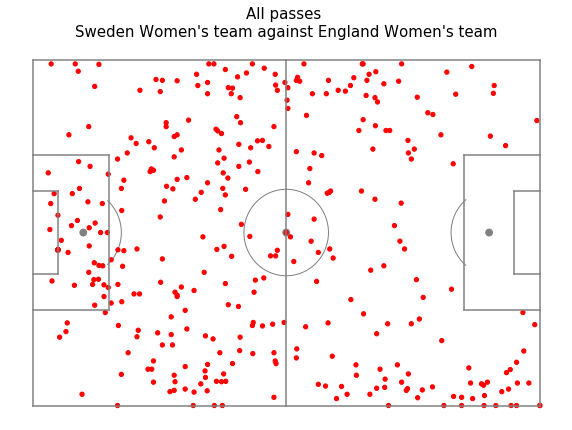

In [53]:
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')


for i,pass_ in passes.query("team_name.str.startswith('Sweden')").iterrows():
    x=pass_['location'][0]
    y=pass_['location'][1]

    team_name=pass_['team_name']
    
    circleSize=0.5
    #circleSize=np.sqrt(shot['shot_statsbomb_xg']*15)
    
    shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")     
    ax.add_patch(shotCircle)    
    

plt.title('All passes \n{} team against {} team'.format(away_team_required, home_team_required), size=15) 


fig.set_size_inches(10, 7)

# Plot only passes made by Caroline Seger (she is Sara Caroline Seger in the database)

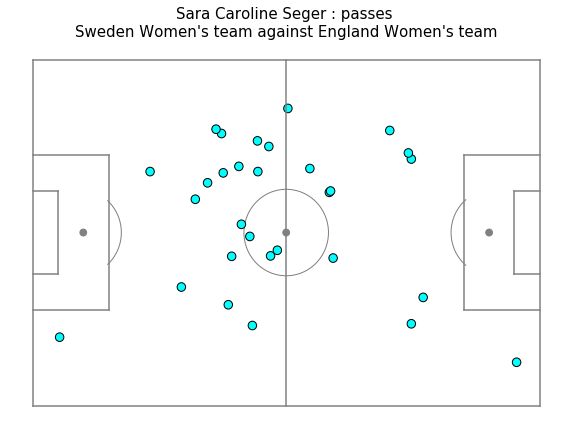

In [52]:
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')


for i,pass_ in passes.query("team_name.str.startswith('Sweden') & player_name=='Sara Caroline Seger'").iterrows():
    x=pass_['location'][0]
    y=pass_['location'][1]

    team_name=pass_['team_name']
    
    circleSize=1
    #circleSize=np.sqrt(shot['shot_statsbomb_xg']*15)
    
    shotCircle=plt.Circle((x,pitchWidthY-y),circleSize, edgecolor='black', linewidth='1', facecolor='cyan')     
    ax.add_patch(shotCircle)    
    
plt.title('{} : passes \n{} team against {} team'.format('Sara Caroline Seger',away_team_required, home_team_required), size=15)  


fig.set_size_inches(10, 7)

# Plot arrows to show where the passes went

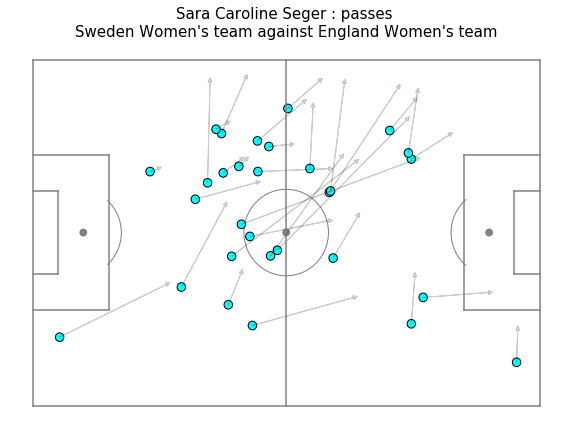

In [51]:


(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')


for i,pass_ in passes.query("team_name.str.startswith('Sweden') & player_name=='Sara Caroline Seger'").iterrows():
    x=pass_['location'][0]
    y=pass_['location'][1]
    x2 = pass_['pass_end_location'][0]
    y2 = pass_['pass_end_location'][1]
    team_name=pass_['team_name']
    
    circleSize=1
    #circleSize=np.sqrt(shot['shot_statsbomb_xg']*15)
    
    shotCircle=plt.Circle((x,pitchWidthY-y),circleSize, edgecolor='black', linewidth='1', facecolor='cyan')     
    ax.add_patch(shotCircle)    
    plt.arrow(x,pitchWidthY-y,abs(x2-x),abs(y2-y), length_includes_head=True,
          head_width=1, head_length=1, alpha=0.2)
    
plt.title('{} : passes \n{} team against {} team'.format('Sara Caroline Seger',away_team_required, home_team_required), size=15) 


fig.set_size_inches(10, 7)